In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

In [ ]:
os.chdir('/content/drive/MyDrive/CrowdCounting/CSRNet-pytorch-master/CSRNet-pytorch-master')

In [ ]:
!ls

dataset.py	    part_A_train.json		part_B_val.json
image.py	    part_A_train_with_val.json	__pycache__
make_dataset.ipynb  part_A_val.json		README.md
make_model.ipynb    part_B_test.json		train.py
model.py	    part_B_train.json		utils.py
part_A_test.json    part_B_train_with_val.json	val.ipynb


In [ ]:
import os

In [ ]:
os.chdir("/content/drive/MyDrive/CrowdCounting/CSRNet-pytorch-master/CSRNet-pytorch-master")

In [ ]:
!ls

dataset.py	    part_A_train.json		part_B_val.json
image.py	    part_A_train_with_val.json	__pycache__
make_dataset.ipynb  part_A_val.json		README.md
make_model.ipynb    part_B_test.json		train.py
model.py	    part_B_train.json		utils.py
part_A_test.json    part_B_train_with_val.json	val.ipynb


In [ ]:
#importing libraries
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter
import scipy
import json
import torchvision.transforms.functional as F
from matplotlib import cm as CM
from image import *
from model import CSRNet
import torch
%matplotlib inline

In [ ]:
# /content/drive/MyDrive/0model_best.pth.tar

model = CSRNet()






Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

In [ ]:
from torchvision import datasets, transforms
transform=transforms.Compose([
                      transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225]),
                  ])

In [ ]:
model = model.cuda()


In [ ]:
#loading the trained weights
checkpoint = torch.load('/content/drive/MyDrive/0model_best.pth.tar')

In [ ]:
model.load_state_dict(checkpoint['state_dict'])


<All keys matched successfully>

Predicted Count :  216


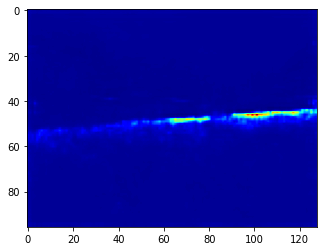

In [ ]:
from matplotlib import cm as c
# img = transform(Image.open('part_A/test_data/images/IMG_100.jpg').convert('RGB')).cuda()
img = transform(Image.open('/content/drive/MyDrive/CrowdCounting/part_A_final/test_data/images/IMG_12.jpg').convert('RGB')).cuda()



output = model(img.unsqueeze(0))
print("Predicted Count : ",int(output.detach().cpu().sum().numpy()))
temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
plt.imshow(temp,cmap = c.jet)
plt.show()


In [ ]:
img1 = transform(Image.open('/content/drive/MyDrive/CrowdCounting/part_A_final/test_data/images/IMG_12.jpg').convert('RGB')).cuda()

In [ ]:
mat = io.loadmat('/content/drive/MyDrive/CrowdCounting/part_A_final/test_data/images/IMG_12.jpg'.replace('.jpg','.mat').replace('images','ground_truth').replace('IMG_','GT_IMG_'))


In [ ]:
img2 = plt.imread('/content/drive/MyDrive/CrowdCounting/part_A_final/test_data/images/IMG_12.jpg')

In [ ]:
k = np.zeros((img2.shape[0],img2.shape[1]))
gt = mat["image_info"][0,0][0,0][0]

In [ ]:
for i in range(0,len(gt)):
        if int(gt[i][1])<img2.shape[0] and int(gt[i][0])<img2.shape[1]:
            k[int(gt[i][1]),int(gt[i][0])]=1

In [ ]:
k = gaussian_filter_density(k)


(768, 1024)
generate density...
done.


In [ ]:
with h5py.File('/content/drive/MyDrive/CrowdCounting/part_A_final/test_data/images/IMG_12.jpg'.replace('.jpg','.h5').replace('images','ground_truth'), 'w') as hf:
            hf['density'] = k


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Predicted Count :  384


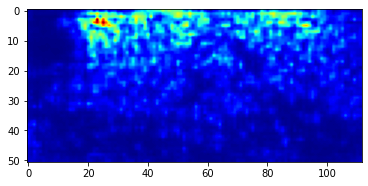

In [ ]:
from matplotlib import cm as c
# img = transform(Image.open('part_A/test_data/images/IMG_100.jpg').convert('RGB')).cuda()
img = transform(Image.open('/content/drive/MyDrive/CrowdCounting/part_A_final/test_data/images/IMG_100.jpg').convert('RGB')).cuda()



output = model(img.unsqueeze(0))
print("Predicted Count : ",int(output.detach().cpu().sum().numpy()))
temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
plt.imshow(temp,cmap = c.jet)
plt.show()


In [ ]:
# mae = 0
# for i in tqdm(range(len(img_paths))):
#     img = transform(Image.open(img_paths[i]).convert('RGB')).cuda()
#     gt_file = h5py.File(img_paths[i].replace('.jpg','.h5').replace('images','ground-truth'),'r')
#     groundtruth = np.asarray(gt_file['density'])
#     output = model(img.unsqueeze(0))
#     mae += abs(output.detach().cpu().sum().numpy()-np.sum(groundtruth))
# print (mae/len(img_paths))





for img_path in img_paths:
    print img_path
    mat = io.loadmat(img_path.replace('.jpg','.mat').replace('images','ground_truth').replace('IMG_','GT_IMG_'))
    img= plt.imread(img_path)
    k = np.zeros((img.shape[0],img.shape[1]))
    gt = mat["image_info"][0,0][0,0][0]
    for i in range(0,len(gt)):
        if int(gt[i][1])<img.shape[0] and int(gt[i][0])<img.shape[1]:
            k[int(gt[i][1]),int(gt[i][0])]=1
    k = gaussian_filter_density(k)
    with h5py.File(img_path.replace('.jpg','.h5').replace('images','ground_truth'), 'w') as hf:
            hf['density'] = k

In [ ]:
img1 = transform(Image.open('/content/drive/MyDrive/CrowdCounting/part_A_final/test_data/images/IMG_100.jpg').convert('RGB')).cuda()

In [ ]:
gt_file = h5py.File('/content/drive/MyDrive/CrowdCounting/part_A_final/test_data/images/IMG_100.jpg'.replace('.jpg','.h5').replace('images','ground-truth'),'r')


In [ ]:
mat = io.loadmat('/content/drive/MyDrive/CrowdCounting/part_A_final/test_data/images/IMG_100.jpg'.replace('.jpg','.mat').replace('images','ground_truth').replace('IMG_','GT_IMG_'))


In [ ]:
img2 = plt.imread('/content/drive/MyDrive/CrowdCounting/part_A_final/test_data/images/IMG_100.jpg')

In [ ]:
k = np.zeros((img2.shape[0],img2.shape[1]))
gt = mat["image_info"][0,0][0,0][0]

In [ ]:
for i in range(0,len(gt)):
        if int(gt[i][1])<img2.shape[0] and int(gt[i][0])<img2.shape[1]:
            k[int(gt[i][1]),int(gt[i][0])]=1

In [ ]:
k = gaussian_filter_density(k)


(409, 902)
generate density...
done.


In [ ]:
with h5py.File('/content/drive/MyDrive/CrowdCounting/part_A_final/test_data/images/IMG_100.jpg'.replace('.jpg','.h5').replace('images','ground_truth'), 'w') as hf:
            hf['density'] = k

In [ ]:
root = '/content/drive/MyDrive/CrowdCounting/'

In [ ]:
#now generate the ShanghaiA's ground truth
part_A_train = os.path.join(root,'part_A_final/train_data','images')
part_A_test = os.path.join(root,'part_A_final/test_data','images')
part_B_train = os.path.join(root,'part_B_final/train_data','images')
part_B_test = os.path.join(root,'part_B_final/test_data','images')
path_sets = [part_A_train,part_A_test]

In [ ]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

In [ ]:
for img_path in img_paths:
    print(img_path)
    mat = io.loadmat(img_path.replace('.jpg','.mat').replace('images','ground_truth').replace('IMG_','GT_IMG_'))
    img= plt.imread(img_path)
    k = np.zeros((img.shape[0],img.shape[1]))
    gt = mat["image_info"][0,0][0,0][0]
    for i in range(0,len(gt)):
        if int(gt[i][1])<img.shape[0] and int(gt[i][0])<img.shape[1]:
            k[int(gt[i][1]),int(gt[i][0])]=1
    k = gaussian_filter_density(k)
    with h5py.File(img_path.replace('.jpg','.h5').replace('images','ground_truth'), 'w') as hf:
            hf['density'] = k

In [ ]:
plt.imshow(Image.open(img_paths[0]))

In [ ]:
gt_file = h5py.File(img_paths[0].replace('.jpg','.h5').replace('images','ground_truth'),'r')
groundtruth = np.asarray(gt_file['density'])
plt.imshow(groundtruth,cmap=CM.jet)

In [ ]:
from scipy.spatial import KDTree


In [ ]:
#this is borrowed from https://github.com/davideverona/deep-crowd-counting_crowdnet
def gaussian_filter_density(gt):
    print(gt.shape)
    density = np.zeros(gt.shape, dtype=np.float32)
    gt_count = np.count_nonzero(gt)
    if gt_count == 0:
        return density

    # pts = np.array(zip(np.nonzero(gt)[1], np.nonzero(gt)[0]))
    pts = np.array(list(zip(np.nonzero(gt)[1], np.nonzero(gt)[0])))

    leafsize = 2048
    # build kdtree
    # tree = scipy.spatial.KDTree(pts.copy(), leafsize=leafsize)
    tree = KDTree(pts.copy(), leafsize=leafsize)

    # query kdtree
    distances, locations = tree.query(pts, k=4)

    print('generate density...')
    for i, pt in enumerate(pts):
        pt2d = np.zeros(gt.shape, dtype=np.float32)
        pt2d[pt[1],pt[0]] = 1.
        if gt_count > 1:
            sigma = (distances[i][1]+distances[i][2]+distances[i][3])*0.1
        else:
            sigma = np.average(np.array(gt.shape))/2./2. #case: 1 point
        density += scipy.ndimage.filters.gaussian_filter(pt2d, sigma, mode='constant')
    print('done.')
    return density

Original Count :  384


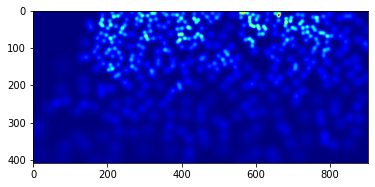

Original Image


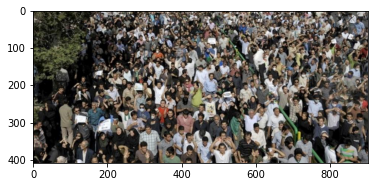

In [ ]:
# temp = h5py.File('part_A/test_data/ground-truth/IMG_100.h5', 'r')


temp = h5py.File('/content/drive/MyDrive/CrowdCounting/part_A_final/test_data/ground_truth/IMG_100.h5', 'r')




temp_1 = np.asarray(temp['density'])
plt.imshow(temp_1,cmap = c.jet)
print("Original Count : ",int(np.sum(temp_1)) + 1)
plt.show()
print("Original Image")


# plt.imshow(plt.imread('part_A/test_data/images/IMG_100.jpg'))


plt.imshow(plt.imread('/content/drive/MyDrive/CrowdCounting/part_A_final/test_data/images/IMG_100.jpg'))




plt.show()

In [ ]:
import tqdm

In [ ]:
root = '/content/drive/MyDrive/CrowdCounting/'

In [ ]:
part_A_train = os.path.join(root,'part_A_final/train_data','images')
part_A_test = os.path.join(root,'part_A_final/test_data','images')
part_B_train = os.path.join(root,'part_B_final/train_data','images')
part_B_test = os.path.join(root,'part_B_final/test_data','images')
path_sets = [part_A_train,part_A_test]

In [ ]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)


In [ ]:
print(img_paths)

['/content/drive/MyDrive/CrowdCounting/part_A_final/train_data/images/IMG_105.jpg', '/content/drive/MyDrive/CrowdCounting/part_A_final/train_data/images/IMG_101.jpg', '/content/drive/MyDrive/CrowdCounting/part_A_final/train_data/images/IMG_104.jpg', '/content/drive/MyDrive/CrowdCounting/part_A_final/train_data/images/IMG_110.jpg', '/content/drive/MyDrive/CrowdCounting/part_A_final/train_data/images/IMG_111.jpg', '/content/drive/MyDrive/CrowdCounting/part_A_final/train_data/images/IMG_109.jpg', '/content/drive/MyDrive/CrowdCounting/part_A_final/train_data/images/IMG_108.jpg', '/content/drive/MyDrive/CrowdCounting/part_A_final/train_data/images/IMG_100.jpg', '/content/drive/MyDrive/CrowdCounting/part_A_final/train_data/images/IMG_11.jpg', '/content/drive/MyDrive/CrowdCounting/part_A_final/train_data/images/IMG_10.jpg', '/content/drive/MyDrive/CrowdCounting/part_A_final/train_data/images/IMG_107.jpg', '/content/drive/MyDrive/CrowdCounting/part_A_final/train_data/images/IMG_1.jpg', '/conte

In [ ]:
import tqdm

In [ ]:
# tqdm example 
# tqdm in for loop 
# line wise test

In [ ]:
mae = 0

In [ ]:
import tqdm

In [ ]:
!pip install tqdm

In [ ]:
from tqdm import tqdm

In [ ]:
mae = 0
for i in tqdm(range(len(img_paths))):
    img = transform(Image.open(img_paths[i]).convert('RGB')).cuda()
    gt_file = h5py.File(img_paths[i].replace('.jpg','.h5').replace('images','ground-truth'),'r')
    groundtruth = np.asarray(gt_file['density'])
    output = model(img.unsqueeze(0))
    mae += abs(output.detach().cpu().sum().numpy()-np.sum(groundtruth))
print (mae/len(img_paths))

  0%|          | 0/482 [00:00<?, ?it/s]


OSError: ignored

In [ ]:
img = transform(Image.open('/content/drive/MyDrive/CrowdCounting/part_A_final/test_data/images/IMG_100.jpg').convert('RGB')).cuda()

In [ ]:
gt_file = h5py.File("/content/drive/MyDrive/CrowdCounting/part_A_final/test_data/ground_truth/IMG_100.h5".replace('.jpg','.h5').replace('images','ground-truth'),'r')

In [ ]:
groundtruth = np.asarray(gt_file['density'])

In [ ]:
output = model(img.unsqueeze(0))

In [ ]:
mae = 0 

In [ ]:
mae += abs(output.detach().cpu().sum().numpy()-np.sum(groundtruth))

In [ ]:
# print (mae/len(img_paths))
# We took only one image to calculate mae
print(mae)

0.32611083984375


Original Count :  320


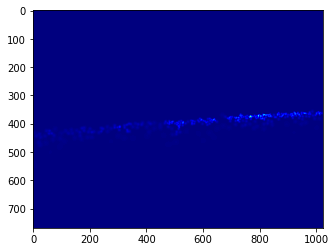

Original Image


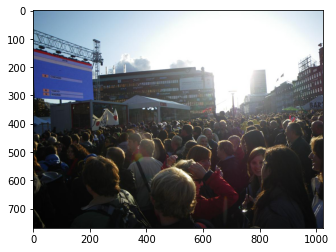

In [ ]:
# temp = h5py.File('part_A/test_data/ground-truth/IMG_100.h5', 'r')


temp = h5py.File('/content/drive/MyDrive/CrowdCounting/part_A_final/test_data/ground_truth/IMG_12.h5', 'r')




temp_1 = np.asarray(temp['density'])
plt.imshow(temp_1,cmap = c.jet)
print("Original Count : ",int(np.sum(temp_1)) + 1)
plt.show()
print("Original Image")


# plt.imshow(plt.imread('part_A/test_data/images/IMG_100.jpg'))


plt.imshow(plt.imread('/content/drive/MyDrive/CrowdCounting/part_A_final/test_data/images/IMG_12.jpg'))




plt.show()